In [45]:
import numpy as np
import pandas as pd 
import nltk 
import string
from collections import Counter

In [46]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
import re

def remove_punct(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

def remove_stopwords(text):
    words = word_tokenize(text)
    without_stopwords = " ".join([w for w in words if w.lower() not in stopwords.words('english')])
    return without_stopwords

def add_count(values):
    def add_count_(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return add_count_

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/raphaelletseng/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/raphaelletseng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/raphaelletseng/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [47]:
def transform_dataframe(df):
    df = df.copy()
    df[['headline_1_title', 'headline_1_url']] = df['headline_1'].str.split('https://', n=1, expand=True)
    df[['headline_2_title', 'headline_2_url']] = df['headline_2'].str.split('https://', n=1, expand=True)
    df[['headline_3_title', 'headline_3_url']] = df['headline_3'].str.split('https://', n=1, expand=True)
    df.drop(['headline_1', 'headline_2', 'headline_3'], axis=1)
    for i in ['headline_1_url', 'headline_2_url', 'headline_3_url']:
        df[i] = 'https://' + df[i].astype(str)
    melted = pd.melt(df, id_vars=['org', 'scraped_at'], value_vars=['headline_1_title', 'headline_2_title', 'headline_3_title'], var_name='headline_type', value_name='headline')
    melted_urls = pd.melt(df, id_vars=['org', 'scraped_at'], value_vars=['headline_1_url', 'headline_2_url', 'headline_3_url'], var_name='headline_url', value_name='url')
    melted['url'] = melted_urls['url']
    final_df = melted[['headline', 'url', 'org', 'scraped_at', 'headline_type']]
    final_df['headline_type'] = final_df['headline_type'].str.extract(r'headline_(\d+)_title')
    return final_df

def clean_data(df):
    df['headline'] = df['headline'].apply(lambda x: remove_stopwords(x))
    df['headline'] = df['headline'].apply(lambda x: remove_punct(x))
    df['headline'] = df['headline'].apply(lambda x: remove_stopwords(x))

    return df

def get_most_common_words(df):
    all_headlines = ''.join(df['headline'])     
    words_counts = Counter(word_tokenize(all_headlines))
    most_common_words = words_counts.most_common(20)
    most_common_words_df = pd.DataFrame(most_common_words, columns=['word', 'count'])
    return most_common_words_df

def main(df):
    df = transform_dataframe(df)
    df = clean_data(df)
    df = get_most_common_words(df)
    df = df[df['word'] != "'"]
    return df

def draw_pie(full_df, common_words_df, organisation):
    top_ten = common_words_df.head(10)
    pie = top_ten.plot.pie(labels=common_words_df['word'], y='count', autopct=add_count(top_ten['count']), figsize=(10, 10))
    pie.get_legend().remove()
    pie.set_ylabel('')
    pie.set_title(f'Top 10 Most Common Words in Headlines from {full_df['scraped_at'].min()} to {full_df['scraped_at'].max()} for {organisation}')



            word  count
1          Trump     77
2           Gaza     71
3             US     38
5           says     33
6      ceasefire     29
7        tariffs     23
8            new     22
9            war     22
10          Musk     17
11       Israeli     17
12        Donald     16
13        Israel     14
14        return     13
15         talks     13
16  Palestinians     13
17         China     13
18          deal     12
19          plan     11
                          org                 scraped_at  \
4   https://www.economist.com 2025-02-14 05:36:17.909053   
5  https://www.lemonde.fr/en/ 2025-02-14 05:36:16.833857   
6         https://www.bbc.com 2025-02-14 05:36:16.058816   
7   https://www.aljazeera.com 2025-02-14 05:36:15.349486   
8   https://www.economist.com 2025-02-13 05:36:09.237911   

                                          headline_1  \
4  Will Donald Trump and Elon Musk wreck or refor...   
5  Louis 'the American' Sarkozy's return to Franc...   
6  Analysis: Ze

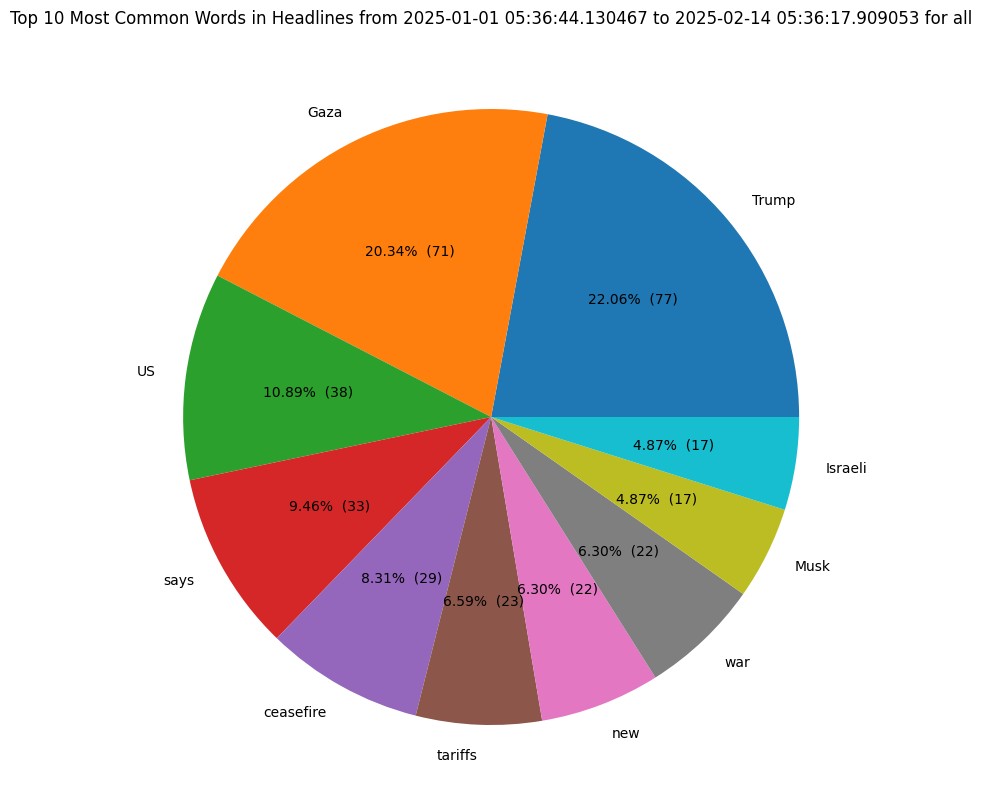

In [49]:
original_df = pd.read_csv('updated_headlines.csv', parse_dates=['scraped_at'])
#2025 Jan - Feb 15th
filter_2025 = original_df.loc[(original_df['scraped_at'] >= '2025-01-01') & (original_df['scraped_at'] <= '2025-02-15')]
most_common_words_df = main(filter_2025)
for idx, word in enumerate(most_common_words_df['word']):
    if word == "’" or word == "‘":
        most_common_words_df.drop(idx, inplace=True)
print(most_common_words_df)
draw_pie(filter_2025, most_common_words_df, 'all')
print(filter_2025.head())

’ 0
‘ 3
                            org                 scraped_at  \
188   https://www.economist.com 2024-12-30 05:37:08.529252   
189  https://www.lemonde.fr/en/ 2024-12-30 05:37:07.368783   
190         https://www.bbc.com 2024-12-30 05:37:06.483134   
191   https://www.aljazeera.com 2024-12-30 05:37:05.701627   
192   https://www.economist.com 2024-12-29 05:35:15.623299   

                                            headline_1  \
188  Jimmy Carter was perhaps the most virtuous of ...   
189  Jimmy Carter, former president of the United S...   
190  Video captures moments before South Korea plan...   
191  Israel attacks two more hospitals as winter ad...   
192  Why you’re not on holiday in India right now, ...   

                                            headline_2  \
188  China’s firms are taking flight, worrying its ...   
189  Pakistan faces unprecedented resurgence of Tal...   
190  'It's unbearable': Families mourn after S Kore...   
191  South Korea’s worst-ever plane cr

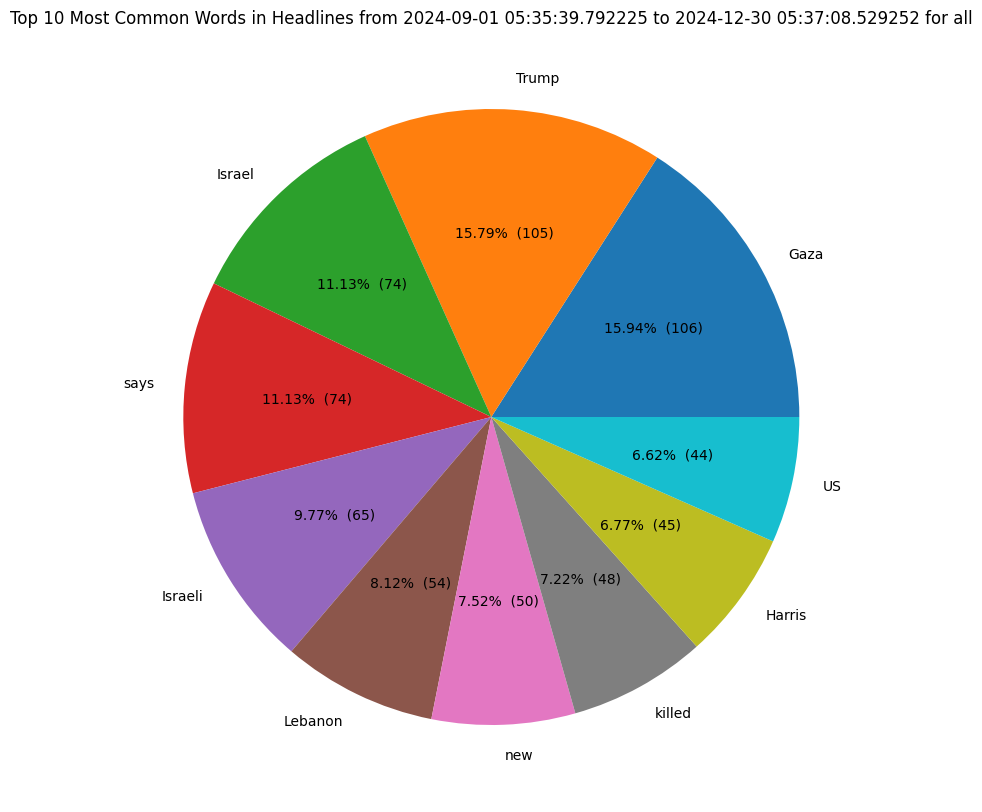

In [50]:
original_df = pd.read_csv('updated_headlines.csv', parse_dates=['scraped_at'])
# Sept - Dec 2024
filter_sept_dec_2024 = original_df.loc[(original_df['scraped_at'] >= '2024-09-01') & (original_df['scraped_at'] <= '2024-12-31')]
most_common_words_df = main(filter_sept_dec_2024)
for idx, word in enumerate(most_common_words_df['word']):
    if word == "’" or word == "‘":
        print(word, idx)
        most_common_words_df.drop(idx, inplace=True)

draw_pie(filter_sept_dec_2024, most_common_words_df, 'all')
print(filter_sept_dec_2024.head())

’ 0
‘ 2
                            org                 scraped_at  \
188   https://www.economist.com 2024-12-30 05:37:08.529252   
189  https://www.lemonde.fr/en/ 2024-12-30 05:37:07.368783   
190         https://www.bbc.com 2024-12-30 05:37:06.483134   
191   https://www.aljazeera.com 2024-12-30 05:37:05.701627   
192   https://www.economist.com 2024-12-29 05:35:15.623299   

                                            headline_1  \
188  Jimmy Carter was perhaps the most virtuous of ...   
189  Jimmy Carter, former president of the United S...   
190  Video captures moments before South Korea plan...   
191  Israel attacks two more hospitals as winter ad...   
192  Why you’re not on holiday in India right now, ...   

                                            headline_2  \
188  China’s firms are taking flight, worrying its ...   
189  Pakistan faces unprecedented resurgence of Tal...   
190  'It's unbearable': Families mourn after S Kore...   
191  South Korea’s worst-ever plane cr

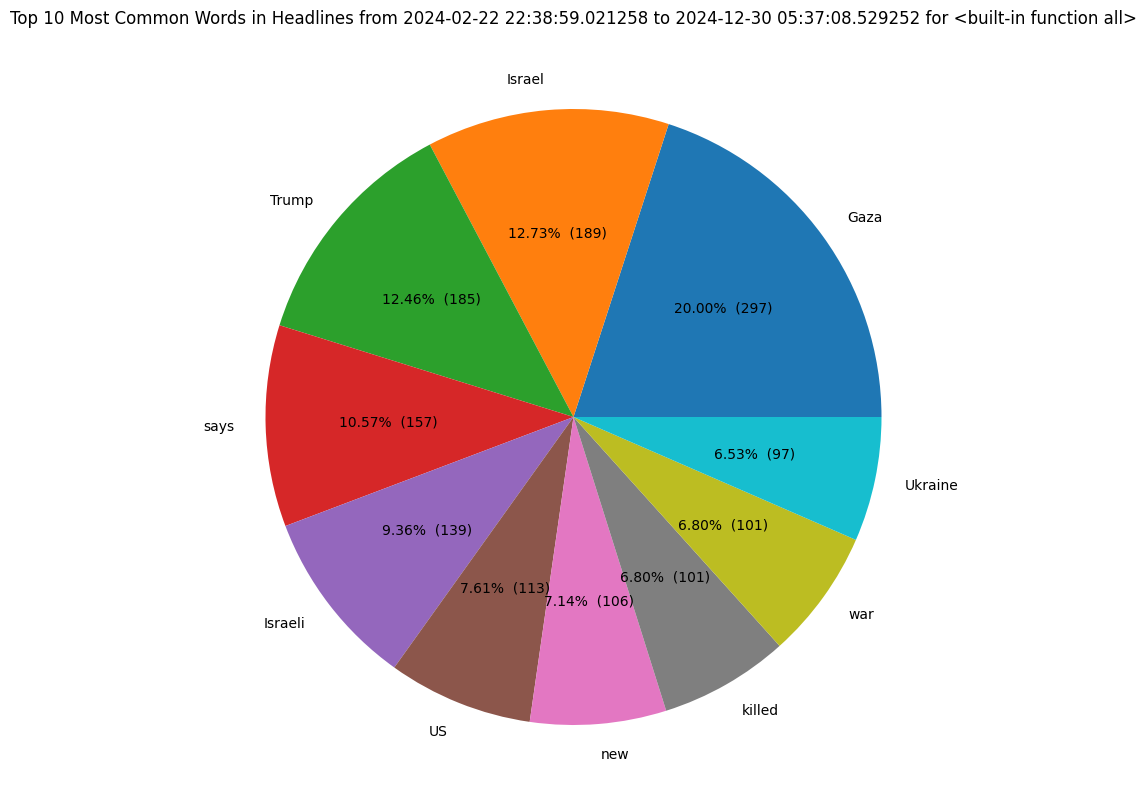

In [51]:
original_df = pd.read_csv('updated_headlines.csv', parse_dates=['scraped_at'])

# 2024 (although data only begins in Feb)
filter_2024 = original_df.loc[(original_df['scraped_at'] >= '2024-01-01') & (original_df['scraped_at'] <= '2024-12-31')]
most_common_words_df = main(filter_2024)
for idx, word in enumerate(most_common_words_df['word']):
    if word == "’" or word == "‘":
        print(word, idx)
        most_common_words_df.drop(idx, inplace=True)

draw_pie(filter_2024, most_common_words_df, all)
print(filter_2024.head())

## The BBC's Top 10 Most Common Words in Headlines across Feb 2024 - Dec 2024

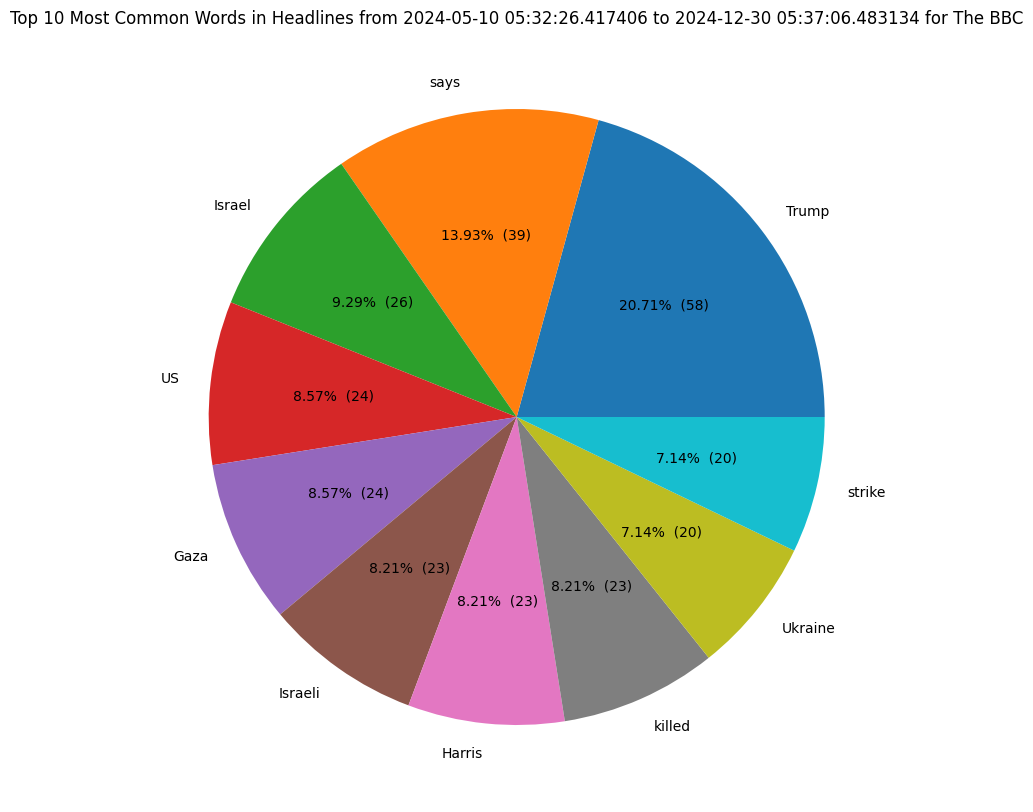

In [59]:
original_df = pd.read_csv('updated_headlines.csv', parse_dates=['scraped_at'])

# 2024 BBC (although data only begins in Feb)
filter_bbc_2024 = original_df.loc[(original_df['scraped_at'] >= '2024-01-01') & (original_df['scraped_at'] <= '2024-12-31') & (original_df['org'] == 'https://www.bbc.com')]

most_common_words_df = main(filter_bbc_2024)
for idx, word in enumerate(most_common_words_df['word']):
    if word == "’" or word == "‘":
        #print(word, idx)
        most_common_words_df.drop(idx, inplace=True)

draw_pie(filter_bbc_2024, most_common_words_df, 'The BBC')
#print(filter_bbc_2024.head())

## Al Jazeera's Top 10 Most Common Words in Headlines across Feb 2024 - Dec 2024
Unsurprisingly, Al Jazeera had relatively more headlines on Gaza and Isreal than the BBC. 

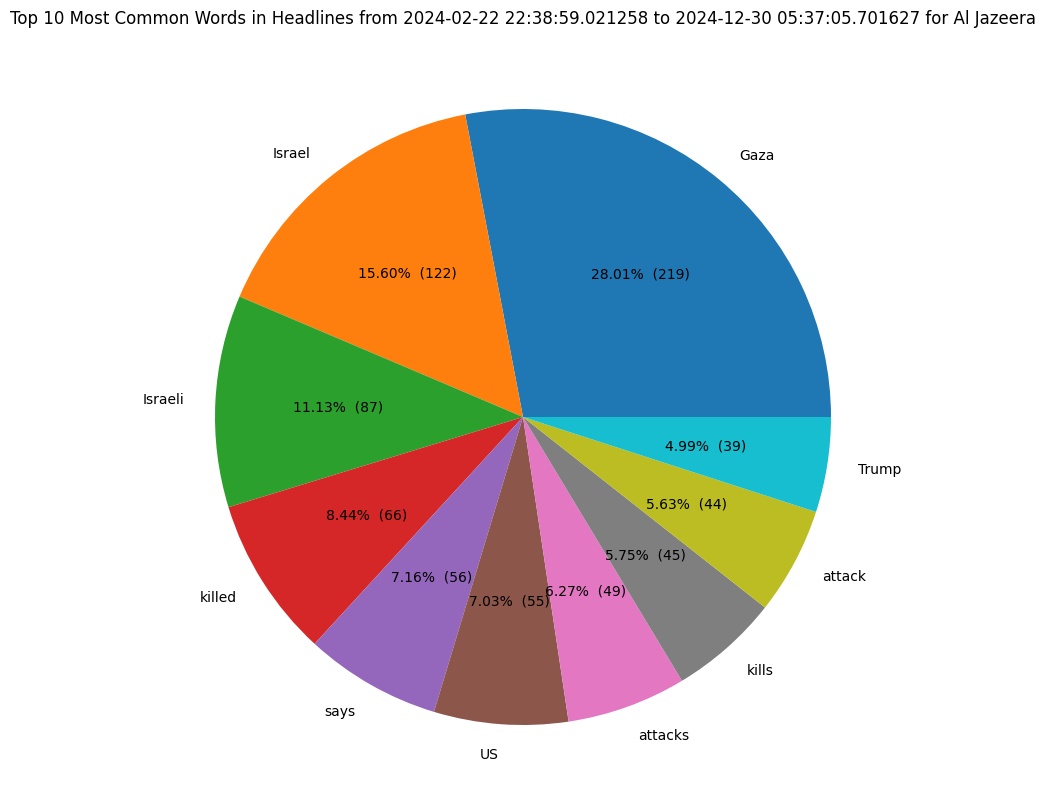

In [60]:
original_df = pd.read_csv('updated_headlines.csv', parse_dates=['scraped_at'])

#2024 Al Jazeera (although data only begins in Feb)
filter_aj_2024 = original_df.loc[(original_df['scraped_at'] >= '2024-01-01') & (original_df['scraped_at'] <= '2024-12-31') & (original_df['org'] == 'https://www.aljazeera.com')]

most_common_words_df = main(filter_aj_2024)
for idx, word in enumerate(most_common_words_df['word']):
    if word == "’" or word == "‘":
        #print(word, idx)
        most_common_words_df.drop(idx, inplace=True)

draw_pie(filter_aj_2024, most_common_words_df, 'Al Jazeera')
#print(filter_aj_2024.head())

## Le Monde's Top 10 Most Common Words in Headlines across Feb 2024 - Dec 2024
Le Monde is a French organisation - it makes sense that 2 of the top 10 words are `France` and `French`.

                            org                 scraped_at  \
189  https://www.lemonde.fr/en/ 2024-12-30 05:37:07.368783   
193  https://www.lemonde.fr/en/ 2024-12-29 05:35:14.692265   
197  https://www.lemonde.fr/en/ 2024-12-28 05:35:49.642756   
201  https://www.lemonde.fr/en/ 2024-12-27 05:36:41.757458   
205  https://www.lemonde.fr/en/ 2024-12-26 05:37:09.538284   

                                            headline_1  \
189  Jimmy Carter, former president of the United S...   
193  A plane carrying 181 passengers catches fire w...   
197  Salomé Zurabishvili, Georgia's president who d...   
201  How Madrid became a laboratory for ultralibera...   
205  French rape trial: From a personal battle to c...   

                                            headline_2  \
189  Pakistan faces unprecedented resurgence of Tal...   
193  'In Mayotte or Valencia, it would be simplisti...   
197  Last major health facility in north Gaza 'out ...   
201  Morocco migrant boat wreck left 70 missin

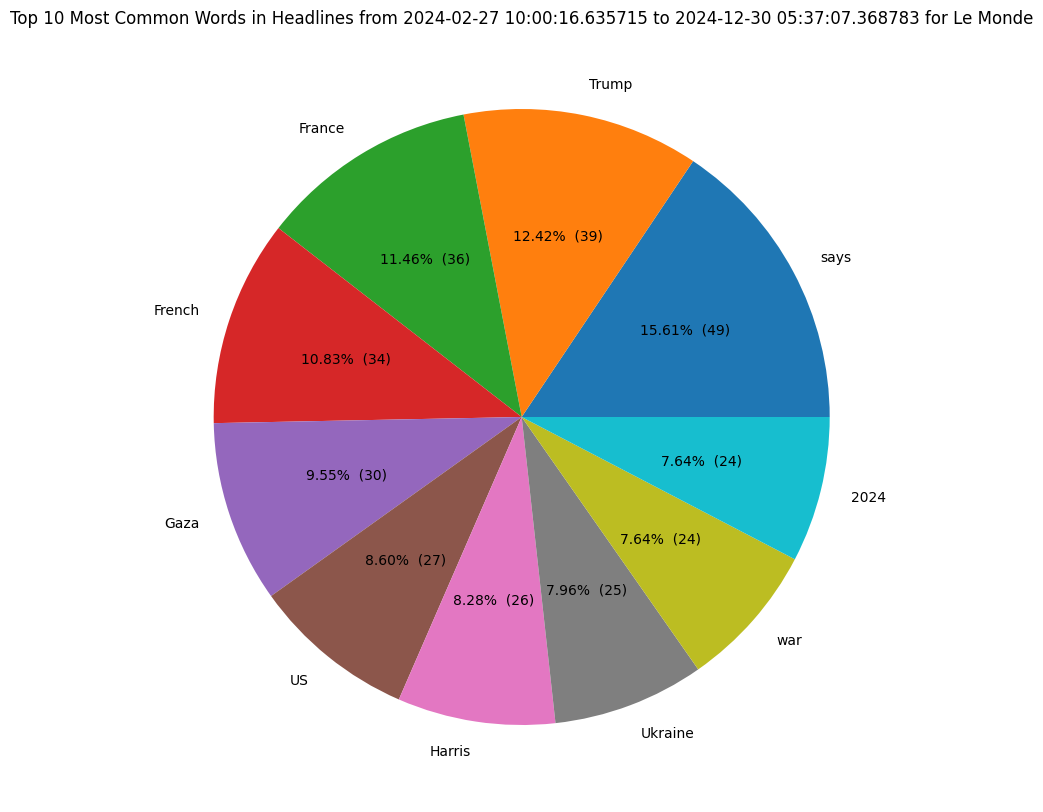

In [58]:
original_df = pd.read_csv('updated_headlines.csv', parse_dates=['scraped_at'])

# 2024 Le Monde (although data only begins in Feb)
filter_lm_2024 = original_df.loc[(original_df['scraped_at'] >= '2024-01-01') & (original_df['scraped_at'] <= '2024-12-31') & (original_df['org'] == 'https://www.lemonde.fr/en/')]

most_common_words_df = main(filter_lm_2024)
for idx, word in enumerate(most_common_words_df['word']):
    if word == "’" or word == "‘":
        #print(word, idx)
        most_common_words_df.drop(idx, inplace=True)

draw_pie(filter_lm_2024, most_common_words_df, 'Le Monde')
#print(filter_lm_2024.head())

## The Economist's Top 10 Most Common Words in Headlines across Feb 2024 - Dec 2024
Also on brand is 'The Economist' having `Economy` in their top 10. 

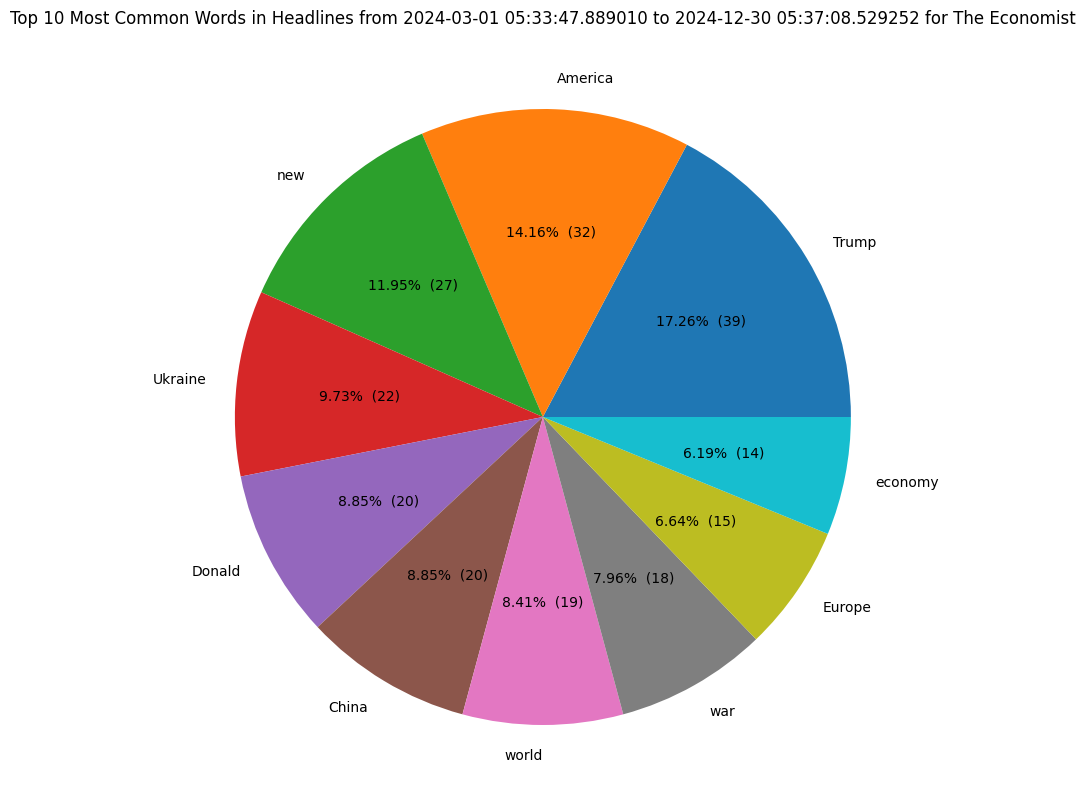

In [70]:
original_df = pd.read_csv('updated_headlines.csv', parse_dates=['scraped_at'])

# 2024 The Economist (although data only begins in Feb)
filter_te_2024 = original_df.loc[(original_df['scraped_at'] >= '2024-01-01') & (original_df['scraped_at'] <= '2024-12-31') & (original_df['org'] == 'https://www.economist.com')]

most_common_words_df = main(filter_te_2024)
for idx, word in enumerate(most_common_words_df['word']):
    if word == "’" or word == "‘" or word =="“" or word == "”":
        most_common_words_df.drop(idx, inplace=True)

draw_pie(filter_te_2024, most_common_words_df, 'The Economist')
